## Plotting word counts through time with Pandas, Resample, and Plotly

***

### 1. Open and prepare the dataset 

***

For this task, I created an example dataset of old-fashioned Dutch boy names. If you are working with your dataframe, then you need at least the following two columns: 
* a column with a date string (e.g. "1950") which can be turned into a Pandas datetime object (here we use years, but the datetime function also recognizes formates such as "10/11/12," which are parsed as "2012-11-10").
* a column with a text string (here we use a few boy names, but full newspaper articles, for example, would work, too). 

In [1]:
# Import some packages and create an example dataset
import warnings
warnings.filterwarnings('ignore') # only use this when you know the script and want to supress unnecessary warnings

# Create a dataframe
import pandas as pd
dict={'year':['1950', '1951', '1952', '1953', '1954'],
      'text':['Cees Aart Arie Jan Otto Gijs Sef Toon', 
              'Cees Aart Arie Jan Otto Gijs Sef Toon Cees Aart Arie Jan Otto Gijs Sef Toon',
              'Aart Arie Toon', 
              'Jan Otto', 
              'Gijs']} 
df=pd.DataFrame(dict,index=['0', '1', '3', '4', '5'])
# in Jupyter Notebooks, you just call the name of a dataframe (e.g. "df") in the bottom of a cell to print it
df

,year,text
0,1950,Cees Aart Arie Jan Otto Gijs Sef Toon
1,1951,Cees Aart Arie Jan Otto Gijs Sef Toon Cees Aar...
3,1952,Aart Arie Toon
4,1953,Jan Otto
5,1954,Gijs


In [2]:
# Convert the date string in the column "year" (e.g. 1950) to a Pandas datetime object 
df['datetime']  = pd.to_datetime(df['year'], errors = 'coerce')
df

,year,text,datetime
0,1950,Cees Aart Arie Jan Otto Gijs Sef Toon,1950-01-01
1,1951,Cees Aart Arie Jan Otto Gijs Sef Toon Cees Aar...,1951-01-01
3,1952,Aart Arie Toon,1952-01-01
4,1953,Jan Otto,1953-01-01
5,1954,Gijs,1954-01-01


***

### 2. Getting the words counts

***

In [3]:
# Word counts for 'term of interest' per year 
# You can resample (aggregate) counts by year, month, week or day, 
# To do so, use either 'A-DEC', 'M', 'W' or 'D' after resample in the code below
# In this example, we work with yearly time series data, so we can only aggregate observations by year

# Below, we create a new column "term_of_interest", and search in the column "text" for "Aart" 
# The asterisk symbol (*) allows you to match on different endings, e.g. "Aart."
# While this is not relevant for this example dataset, it is often necessary in in real-life examples
df['term_of_interest'] = df['text'].str.count('Aart*')

# This is the most import line of code in the script
# In one line, we create a new dataset, with a datetime index 
# and aggregate the count of the term of interest per year
df_word = df.set_index('datetime').resample('A-DEC')['term_of_interest'].sum()
df_word = df_word.reset_index()
print(df_word.sum())
df_word

term_of_interest    4
dtype: int64


,datetime,term_of_interest
0,1950-12-31,1
1,1951-12-31,2
2,1952-12-31,1
3,1953-12-31,0
4,1954-12-31,0


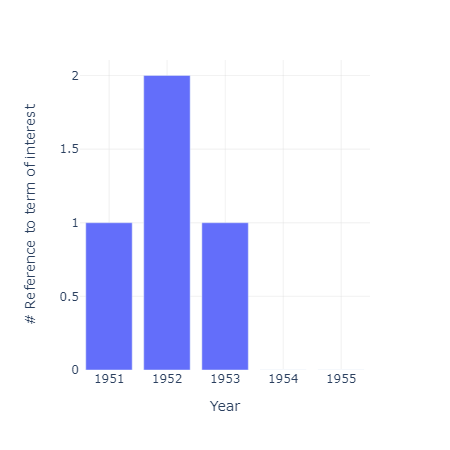

In [4]:
# Optional: use a Plotly bar chart to graph the data
# To run this code, you need to install the Plotly package first 
import plotly.express as px
from IPython.display import Image
fig = px.bar(df_word, x='datetime', y='term_of_interest')
fig.update_layout(showlegend=False,
    xaxis_rangeslider_visible=False,
    width=450,
    height=450)  
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(title_text="Year", showgrid=True, gridwidth=0.3, gridcolor='LightGrey')
fig.update_yaxes(title_text="# Reference to term of interest", showgrid=True, gridwidth=0.3, gridcolor='LightGrey')
# Uncomment the line below for an interactive graph. 
# fig.show()
# However, here we use a static "png" image
Image(fig.to_image(format="png", width=450, height=450))